In [2]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#nlp
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

#model selection
from sklearn.model_selection import train_test_split

#classifiers
from sklearn.linear_model import LogisticRegression


#classification reports
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

#warnings
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
tweets_train = pd.read_csv('/content/train_E6oV3lV.csv')
tweets_test = pd.read_csv('/content/test_tweets_anuFYb8.csv')


In [6]:
tweets_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
tweets_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [8]:
tweets_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

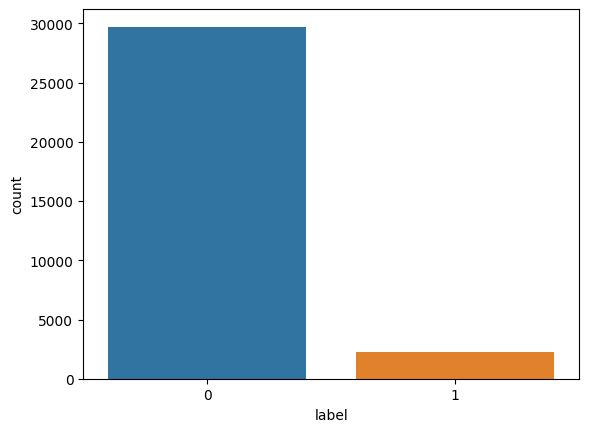

In [9]:
sns.countplot(x = 'label', data = tweets_train)

In [10]:
# creating a samlple data from training data points

sample = tweets_train.sample(n = 100, random_state = 155)

In [11]:
sample

,id,label,tweet
27957,27958,0,@user @user it sure has going to be amazing ...
17573,17574,0,unpacked. opened all the windows. sweater on.
22584,22585,0,@user haha!! omg he's so happy!!
23766,23767,0,@user @user bihday commandoo
27777,27778,0,all good live long bihday@user
...,...,...,...
4257,4258,0,@user mine did too!!!! and my middle from midd...
3371,3372,0,out of office #coffee #sun @ maspalomas
6025,6026,0,guys! i'm out of the house and i don't have a ...
25906,25907,0,half way through the website update #goingwell...


In [15]:
!pip install tweet-preprocessor


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import preprocessor as p
sample['text'] = sample['tweet'].apply(lambda x: p.clean(x))

# the clean method of the preprocessor package can be used to eliminate symbols like #,@ and the urls

In [17]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.7 MB/s eta 0:00:00


In [18]:
import contractions

def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text

In [19]:
sample["text"] = sample["text"].apply(expand_contractions)

In [20]:
wordnet_lemmatizer = WordNetLemmatizer() #initialising the lemmatizer function

In [21]:
def my_normalizer(df):
  #lowercase the input text
  s = df.lower()

  #tokenize (split string into words)
  tokens = nltk.tokenize.word_tokenize(df)

  #remove short words less than or equal to 2
  tokens = [t for t in tokens if len(t) > 2]

  #lemmatazing words (put words into base form)
  tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]

  #remove stopwords
  tokens = [t for t in tokens if t not in set(stopwords.words('english'))]

  #remove digits
  tokens = [t for t in tokens if not any(c.isdigit() for c in t)]

  return tokens

In [24]:
#applying my_normalizer
nltk.download('punkt')
nltk.download('wordnet')

sample["final_text"] = sample["text"].apply(my_normalizer)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [25]:
#extract word from the list
sample['final_text'] = sample['final_text'].apply(lambda x : ' '.join(x))

In [26]:
sample['final_text'].values[:20]

array(['sure ha going amazing xxx', 'unpacked opened window sweater',
       'haha omg happy', 'bihday commandoo', 'good live long bihday',
       'happy',
       'skype nokia microsoft ha decided screw-up acquire linkedin',
       'teaching tonight light', 'waiting friend finish shift ...',
       'got first real job interview week',
       'going poor next year woh end',
       'living street extra tree improve happiness much year younger',
       'welcome', "ever made choice turn 'negative light head",
       'get request communalise much anger', 'make', 'get get get',
       'many shit talkers/bullies youtube comment section',
       'ontiatn wa today exam vaccine dr. latimer happy boy',
       'father day dad involved york schoolboy'], dtype=object)

Applying Text Preprocess to the entire Corpus

In [27]:
#Removing url, #, and @
tweets_train['text'] = tweets_train['tweet'].apply(lambda x: p.clean(x))

In [28]:
#expanding contractions
tweets_train["text"] = tweets_train["text"].apply(expand_contractions)

In [29]:
#applying my_normalizer
tweets_train['text'] = tweets_train["text"].apply(my_normalizer)

In [30]:
#extract word from the list
tweets_train['text'] = tweets_train['text'].apply(lambda x : ' '.join(x))

Preparing Data for Machine Learning Models

In [31]:
#dependent and independent variables

X = tweets_train['text']
y = tweets_train['label']

In [32]:
#tfidf vectorizer
vectorizer = TfidfVectorizer(min_df = 3)
X_vectorized = vectorizer.fit_transform(X)

In [34]:
print('Vocabulary len:', len(vectorizer.get_feature_names_out()))
print('Longest word:', max(vectorizer.vocabulary_, key=len))

Vocabulary len: 6193
Longest word: nationalbestfriendday


In [35]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, 
                                                    shuffle = True, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

#evaluation
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test,y_pred_lr))
print("Score:",round(accuracy_score(y_test,y_pred_lr) * 100, 2))
print("Classification Report:")
print(classification_report(y_test,y_pred_lr))

Confusion Matrix for Logistic Regression:
[[9785   21]
 [ 588  154]]
Score: 94.23
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9806
           1       0.88      0.21      0.34       742

    accuracy                           0.94     10548
   macro avg       0.91      0.60      0.65     10548
weighted avg       0.94      0.94      0.93     10548

